In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.utils import resample
import re
import joblib
import string
import seaborn as sns
import matplotlib.pyplot as plt


In [71]:
fake = pd.read_csv('fake.csv')
true = pd.read_csv('true.csv')

In [72]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [73]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [74]:
fake['class']=0
true['class']=1

In [75]:
data = pd.concat([fake,true], axis = 0)

In [76]:
data.sample(20)

,title,text,subject,date,class
3380,WATCH: Kellyanne Conway Accuses Obama Of Bein...,If someone had called Ronald Reagan un-America...,News,"December 16, 2016",0
7806,"DNC Vice Chair RESIGNS, Declares Support For ...","On Sunday, Tulsi Gabbard appeared on Meet The ...",News,"February 28, 2016",0
5993,"ICRC, jurists join rebuke of Trump torture rem...",GENEVA (Reuters) - The International Committee...,politicsNews,"January 26, 2017",1
510,NYT Bombshell: Trump And McConnell Not Speaki...,Donald Trump has never been Senate Majority Le...,News,"August 22, 2017",0
19032,U.S. keeps up diplomatic efforts to deal with ...,NEW DELHI (Reuters) - Diplomatic efforts to ta...,worldnews,"September 26, 2017",1
18627,LEFT GOES NUTS: Chemist From DC Wins Miss USA ...,The District of Columbia has won back-to-back ...,left-news,"May 15, 2017",0
5256,Trump Gives An Absolutely Jaw-Dropping Answer...,"How do you stop cyber-attacks? Well, if you re...",News,"July 30, 2016",0
12157,LOU DOBBS Says What We’re All Thinking: Trump ...,President-elect @realDonaldTrump s unexpected ...,politics,"Dec 12, 2016",0
17464,WHITE COLLEGE SNOWFLAKES Can ‘Identify’ As Bla...,The latest video from Campus Reform shows just...,left-news,"Dec 30, 2017",0
22778,MSM Fake News: How Washington Post Sexed-up it...,This is a story about how once trusted mainstr...,Middle-east,"September 26, 2017",0


In [77]:
data = data.drop(["title","subject","date"], axis = 1)

In [78]:
data.reset_index(inplace=True)

In [79]:
data.drop(['index'],axis=1,inplace=True)

In [80]:
data.sample


<bound method NDFrame.sample of                                                     text  class
0      Donald Trump just couldn t wish all Americans ...      0
1      House Intelligence Committee Chairman Devin Nu...      0
2      On Friday, it was revealed that former Milwauk...      0
3      On Christmas day, Donald Trump announced that ...      0
4      Pope Francis used his annual Christmas Day mes...      0
...                                                  ...    ...
44893  BRUSSELS (Reuters) - NATO allies on Tuesday we...      1
44894  LONDON (Reuters) - LexisNexis, a provider of l...      1
44895  MINSK (Reuters) - In the shadow of disused Sov...      1
44896  MOSCOW (Reuters) - Vatican Secretary of State ...      1
44897  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...      1

[44898 rows x 2 columns]>

In [81]:
data.sample(5)

,text,class
33180,WASHINGTON (Reuters) - Retired Lieutenant Gene...,1
21594,Because we don t have enough crime in our coun...,0
20938,This is a SHOCKING example of a government put...,0
43793,MOSCOW (Reuters) - Russian Foreign Minister Se...,1
2826,When Trump began his disinformation campaign a...,0


In [82]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[*?.\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text


In [83]:
data['text'] = data['text'].apply(clean_text)

In [84]:
data.sample(15)


,text,class
24024,washington reuters us president donald trump ...,1
5409,rightwing super troll and breitbartcom contrib...,0
9240,when four chicago thugs videotaped the brutal ...,0
29285,sydney reuters the united states will apply ‘...,1
12991,hillary clinton ally david brock is offering t...,0
42429,wellington reuters new zealand s major party ...,1
14749,the dhs has announced that they ll be raiding ...,0
35683,baghdad reuters iraqi shi ite paramilitary gr...,1
21748,it was all an accident it s good to king the o...,0
43130,united nations reuters the iran nuclear deal ...,1


In [85]:
true = resample(true,
                replace=True,  # allow duplicates
                 n_samples=len(fake),  # match fake_df size
                random_state=42)

# Step 3: Combine the balanced datasets
balance = pd.concat([fake, true], ignore_index=True)

# Optional: Shuffle the combined dataset
balance = balance.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 4: Save or use the balanced dataset
balance.to_csv('balanced_dataset.csv', index=False)


In [86]:
df = pd.read_csv('balanced_dataset.csv')

In [92]:
print(balance.columns)

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')


In [93]:
data.sample(20)


,text,class
326,james clapper the director of national intelli...,0
42709,new york reuters france said on saturday it w...,1
37931,dublin reuters as the public face of the iris...,1
25274,washington reuters a percent corporate tax r...,1
41705,madrid reuters spain s government will issue ...,1
44316,washington reuters the united states will sen...,1
8939,some political pundits have been unable to des...,0
43985,london reuters north korea s reckless behavio...,1
5963,with speaker paul ryan rwi canceling his wedne...,0
20259,the common thread in all this is hate the hate...,0


In [94]:
balance['class']  # if your label column is named 'class'

0        0
1        1
2        0
3        1
4        0
        ..
46957    0
46958    1
46959    1
46960    0
46961    0
Name: class, Length: 46962, dtype: int64

In [95]:
balance.rename(columns={'class': 'label'}, inplace=True)

<Axes: xlabel='label', ylabel='count'>

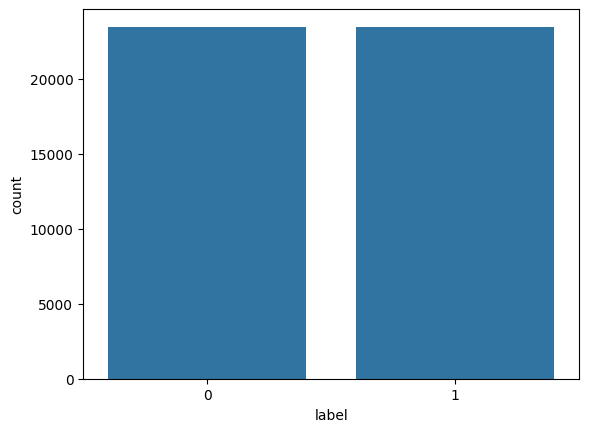

In [96]:
sns.countplot(data=balance, x='label', order=balance['label'].value_counts().index)

In [104]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[*?.\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text



In [105]:
data['text'] = data['text'].apply(clean_text)

In [110]:
data.sample(15)

,text,class
43015,new york reuters the united states will consid...,1
39331,cape town reuters south african president jaco...,1
25908,mexico city reuters a massive image of us pres...,1
38803,washington reuters the us military said on wed...,1
17399,listen to this women speak of voting rights li...,0
3305,keith olbermann did not mince words the end of...,0
11052,a group called people s action just held their...,0
15448,the fundamental transformation of america cont...,0
27250,washington reuters the us senate intelligence ...,1
39672,bethlehem west bank reuters another donald tru...,1


In [107]:
# Split the balanced dataset into train and test sets
X = balance['text']
y = balance['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4607
           1       0.98      0.99      0.99      4786

    accuracy                           0.99      9393
   macro avg       0.99      0.99      0.99      9393
weighted avg       0.99      0.99      0.99      9393



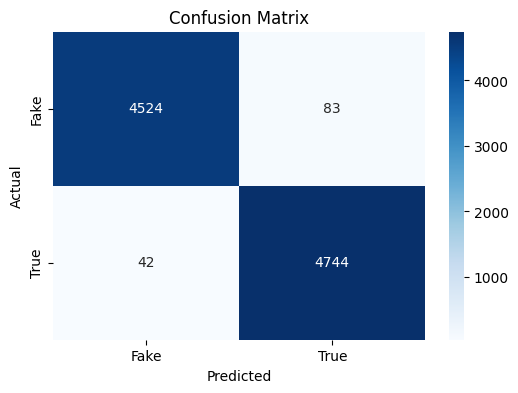

In [113]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

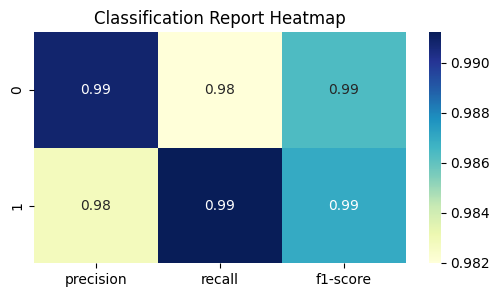

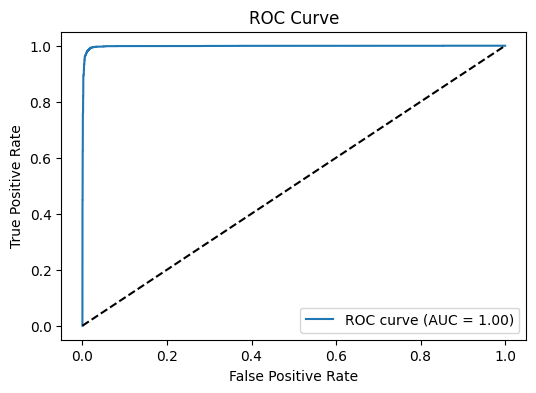

In [109]:
from sklearn.metrics import classification_report, roc_curve, auc
import numpy as np

# Classification report as heatmap
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose().iloc[:2, :3]  # Only 'Fake' and 'True' rows, and precision/recall/f1
plt.figure(figsize=(6,3))
sns.heatmap(report_df, annot=True, cmap='YlGnBu')
plt.title('Classification Report Heatmap')
plt.show()

# ROC Curve
y_prob = model.predict_proba(X_test_tfidf)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()